# Python as a Calculator

Blank notebook to be used for class exercises.

## Exercise 1

Expand on Exercise 5 from 07-Machine-Learning-NLP.ipynb to include CountVectorizer parameters in the GridSearchCV with Pipelines. Include the following CountVectorizer Parameters: stop_words = ['english, None], lowercase=[False, True], and min_df=[1, 5, 10]

- What are the parameters that produce the best micro F1?

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

import csv
import numpy as np
import random


random.seed(42)
np.random.seed(42)

X_txt = []
y = []
with open('../data/sentiment-twitter-data.tsv') as in_file:
    iCSV = csv.reader(in_file, delimiter='\t')
    for row in iCSV:
        X_txt.append(row[3])
        y.append(row[2])
        
X_train_txt, X_test_txt, y_train, y_test = train_test_split(X_txt, y,
                                                            test_size=0.2,
                                                            random_state=42)

params = {'vect__ngram_range':[(1,1), (1,2)],
          'clf__C':[0.1, 1.]}

pipe = Pipeline([("vect", CountVectorizer()),
                 ("clf", LinearSVC())])

clf = GridSearchCV(pipe, params, cv=2)

clf.fit(X_train_txt,y_train)

print("Best Score: {}".format(clf.best_score_))



Best Score: 0.43633807217622245


## Exercise 2

Expanding on Exercise 1, and using the same data, do the following:

- Apply SelectKBest() with chi2 on the training data. What are the most important features with a k=10?
- Add SelectKBest() to the gridsearch pipeline from Exercise 2. Grid-Search over various choices of K. Choose K on your own.
    - What is the best K?
    - Did the performance improve over the model trained on the entire set of features?

In [9]:
from sklearn.feature_selection import SelectKBest, chi2


vec = CountVectorizer()

X_matrix = vec.fit_transform(X_train_txt)

skb = SelectKBest(chi2, k=10)

skb.fit(X_matrix,y_train)

best_feats = np.array(vec.get_feature_names())[skb.get_support(indices=True)]
print(best_feats)

['co' 'excited' 'good' 'great' 'happy' 'http' 'love' 'lt' 'not' 'wait']


## Exercise 3

Apply PCA with 2 dimensions to the iris dataset, then plot the resulting projections.

In [10]:
import csv
import numpy as np
X = []
y = []
with open('../data/datasets/iris/iris.csv') as in_file:
    iCSV = csv.reader(in_file, delimiter=',')
    for row in iCSV:
        y.append(row[-1])
        X.append([float(x) for x in row[:-1]])
X = np.array(X)
y = np.array(y)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_small = pca.fit_transform(X)

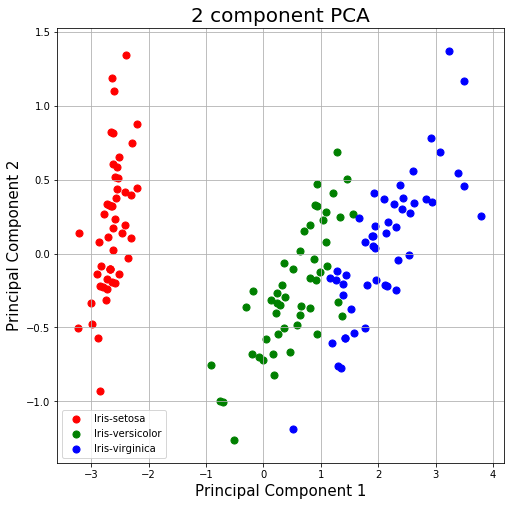

In [14]:
%matplotlib inline

# DO NOT Change this cell!!!

import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(X_small[indicesToKeep,0]
               , X_small[indicesToKeep,1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Exercise 4

Using the  ``prima-indians-diabetes.csv'' dataset compare the F1 score of the following missing data strategies:

- Remove all columns with missing values
- Impute using the mean value.
- Impute using the median

What is the best missing data strategy for this dataset?

**Note:** Missing values are set to 0 in this dataset and only the following columns can have missing values: 2, 3, 4, 5, 6

You will need to convert the 0 values to np.nan.

Here are what the columns represents:

<ol start="0">
<li>Number of times pregnant.</li>
<li>Plasma glucose concentration a 2 hours in an oral glucose tolerance test.</li>
<li>Diastolic blood pressure (mm Hg).</li>
<li>Triceps skinfold thickness (mm).</li>
<li>2-Hour serum insulin (mu U/ml).</li>
<li>Body mass index (weight in kg/(height in m)^2).</li>
<li>Diabetes pedigree function.</li>
<li>Age (years).</li>
<li>Class variable (0 or 1).</li>
</ol>

In [9]:
import csv
import numpy as np
X = []
y = []
with open('../data/prima-indians-diabetes.csv') as in_file:
    iCSV = csv.reader(in_file, delimiter=',')
    for row in iCSV:
        y.append(float(row[-1]))
        X.append([float(x) for x in row[:-1]])
X = np.array(X)
X[X[:,1] == 0,1] = np.nan
X[X[:,2] == 0,2] = np.nan
X[X[:,3] == 0,3] = np.nan
X[X[:,4] == 0,4] = np.nan
X[X[:,5] == 0,5] = np.nan

print(X[:,3])

y = np.array(y)

[35. 29. nan 23. 35. nan 32. nan 45. nan nan nan nan 23. 19. nan 47. nan
 38. 30. 41. nan nan 35. 33. 26. nan 15. 19. nan 26. 36. 11. nan 31. 33.
 nan 37. 42. 47. 25. nan 18. 24. nan 39. nan 27. 32. nan 11. 15. 21. 34.
 42. 10. 39. 60. nan 41. nan nan nan 34. nan 27. 30. nan 13. 27. 20. 35.
 nan 20. 30. 20. nan 33. nan 22. 13. nan 26. 28. nan 29. 54. 25. 32. 19.
 nan 15. 40. nan 18. 27. 28. 18. 30. 51. nan nan nan 18. nan 29. nan 28.
 31. 25. 33. 26. 34. nan 32. nan nan nan 23. 15. 56. 39. 30. nan nan 42.
 30. 36. 24. nan 14. nan 37. 31. 13. 20. 26. 25. nan 29. nan 30. 26. nan
 31. 23. 37. 35. nan 17. 50. nan 28. 42. nan 44. 15. 21. 19. 41. 38. 40.
 34. 23. nan 18. 25. nan nan 12. nan 23. 23. 42. 24. 42. nan 46. nan nan
 nan 18. 20. nan nan 28. 36. 41. 39. 35. nan 44. nan nan 20. 41. nan 13.
 44. 27. 16. nan 20. 16. 32. 28. 29. nan 27. 33. 22. 54. 31. 26. 32. 40.
 41. 30. 22. nan 29. nan nan 33. 15. 27. nan 38. 39. 31. nan 37. 25. nan
 28. nan 21. 27. 21. nan 24. 32. nan 22. 35. 15. na

In [20]:
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# IMPUTE WITH MEAN
imp = Imputer(missing_values=np.nan, strategy='mean')
X_train_mean = imp.fit_transform(X_train)

params = {'kernel':['linear','rbf'], 'C':[1e-4, 1e-3, 1e-2, 1e-1, 1., 10]}
X_test_mean = imp.transform(X_test)

svm = SVC()
clf = GridSearchCV(svm, params, cv=2, scoring='f1_micro')
clf.fit(X_train_mean, y_train)
preds = clf.predict(X_test_mean)

print("MEAN:",f1_score(y_test, preds), 'Val:', clf.best_score_)

# IMPUTE WITH MEAN
imp = Imputer(missing_values=np.nan, strategy='median')
X_train_med = imp.fit_transform(X_train)

X_test_med = imp.transform(X_test)

svm = SVC()
clf = GridSearchCV(svm, params, cv=2, scoring='f1_micro')
clf.fit(X_train_med, y_train)
preds = clf.predict(X_test_med)

print("MEDIAN:", f1_score(y_test, preds), 'Val:', clf.best_score_)

# IMPUTE WITH MEAN
mask = np.isnan(X).any(axis=0)
X_train_filt = X_train[:,~mask]
X_test_filt = X_test[:,~mask]

svm = SVC()
clf = GridSearchCV(svm, params, cv=2, scoring='f1_micro')
clf.fit(X_train_filt, y_train)
preds = clf.predict(X_test_filt)

print("Remove Cols:",f1_score(y_test, preds), 'Val:', clf.best_score_)

MEAN: 0.6542056074766355 Val: 0.762214983713355
MEDIAN: 0.6542056074766355 Val: 0.7654723127035831
Remove Cols: 0.25 Val: 0.6742671009771987
